In [1]:
### Import & setup
import sys
sys.path.append('C:\\Users\\szb37\\My Drive\\Projects\\ADAPT\\ADAPT codebase\\')
import src.config as config
import src.folders as folders
import src.power as power
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.dpi'] = 300  # Set display DPI
plt.style.use('seaborn-v0_8-notebook')  # notebook-optimized

# Efficacy power

In [2]:
### Generate mock data
prefix = 'mock'
n_trials = 300
sample = 240

### Define scenarios for continous outcome data
scenario_params = []
for smd in np.arange(0, 1.2, 0.3):
    smd = round(smd, 1)
    scenario_params.append(
        (f'SMD {smd}', 
        {'type': 'normal',
            'arm_params':{
                'C': {'mean': 1, 'sd': 1,},
                'T': {'mean': 1+smd, 'sd': 1,},                
            },}))

### Get trials data for each scenario
df_patientsData=[]
for scenario_param in scenario_params:
    scenario = scenario_param[0]
    params = scenario_param[1]

    df_patientData = power.DataGeneration.get_df_patientsData(
        scenario = scenario, 
        n_trials = n_trials, 
        sample = sample, 
        params = [params])
    df_patientsData.append(df_patientData)     
           
df_patientsData = pd.concat(df_patientsData, ignore_index=True)
df_patientsData.head()

,scenario,trial,pID,trt,value
0,SMD 0.0,0,0,T,0.085
1,SMD 0.0,0,1,T,2.037
2,SMD 0.0,0,2,T,1.563
3,SMD 0.0,0,3,C,1.173
4,SMD 0.0,0,4,C,1.936


In [3]:
### Calculate CIs
df_CIs = power.Stats.get_df_diffCIs_vector(
    df_patientsData, 
    samples = \
        np.arange(30, 110, 10).tolist() + \
        np.arange(120, 280, 20).tolist(),)

### Renaming columns 
df_CIs = df_CIs.rename(columns={
    'ciL': 'gmg_ciL',    
    'ciH': 'gmg_ciH', 
    'moe': 'gmg_moe',})    
df_CIs = power.Stats.add_sd(df_CIs)
df_CIs.head()

,scenario,trial,sample,gmg_ciL,gmg_ciH,gmg_moe,gmg_sd
0,SMD 0.0,0,30,-0.258,1.083,0.671,False
1,SMD 0.0,0,40,-0.314,0.921,0.618,False
2,SMD 0.0,0,50,-0.460,0.661,0.561,False
3,SMD 0.0,0,60,-0.412,0.638,0.525,False
4,SMD 0.0,0,70,-0.349,0.580,0.465,False


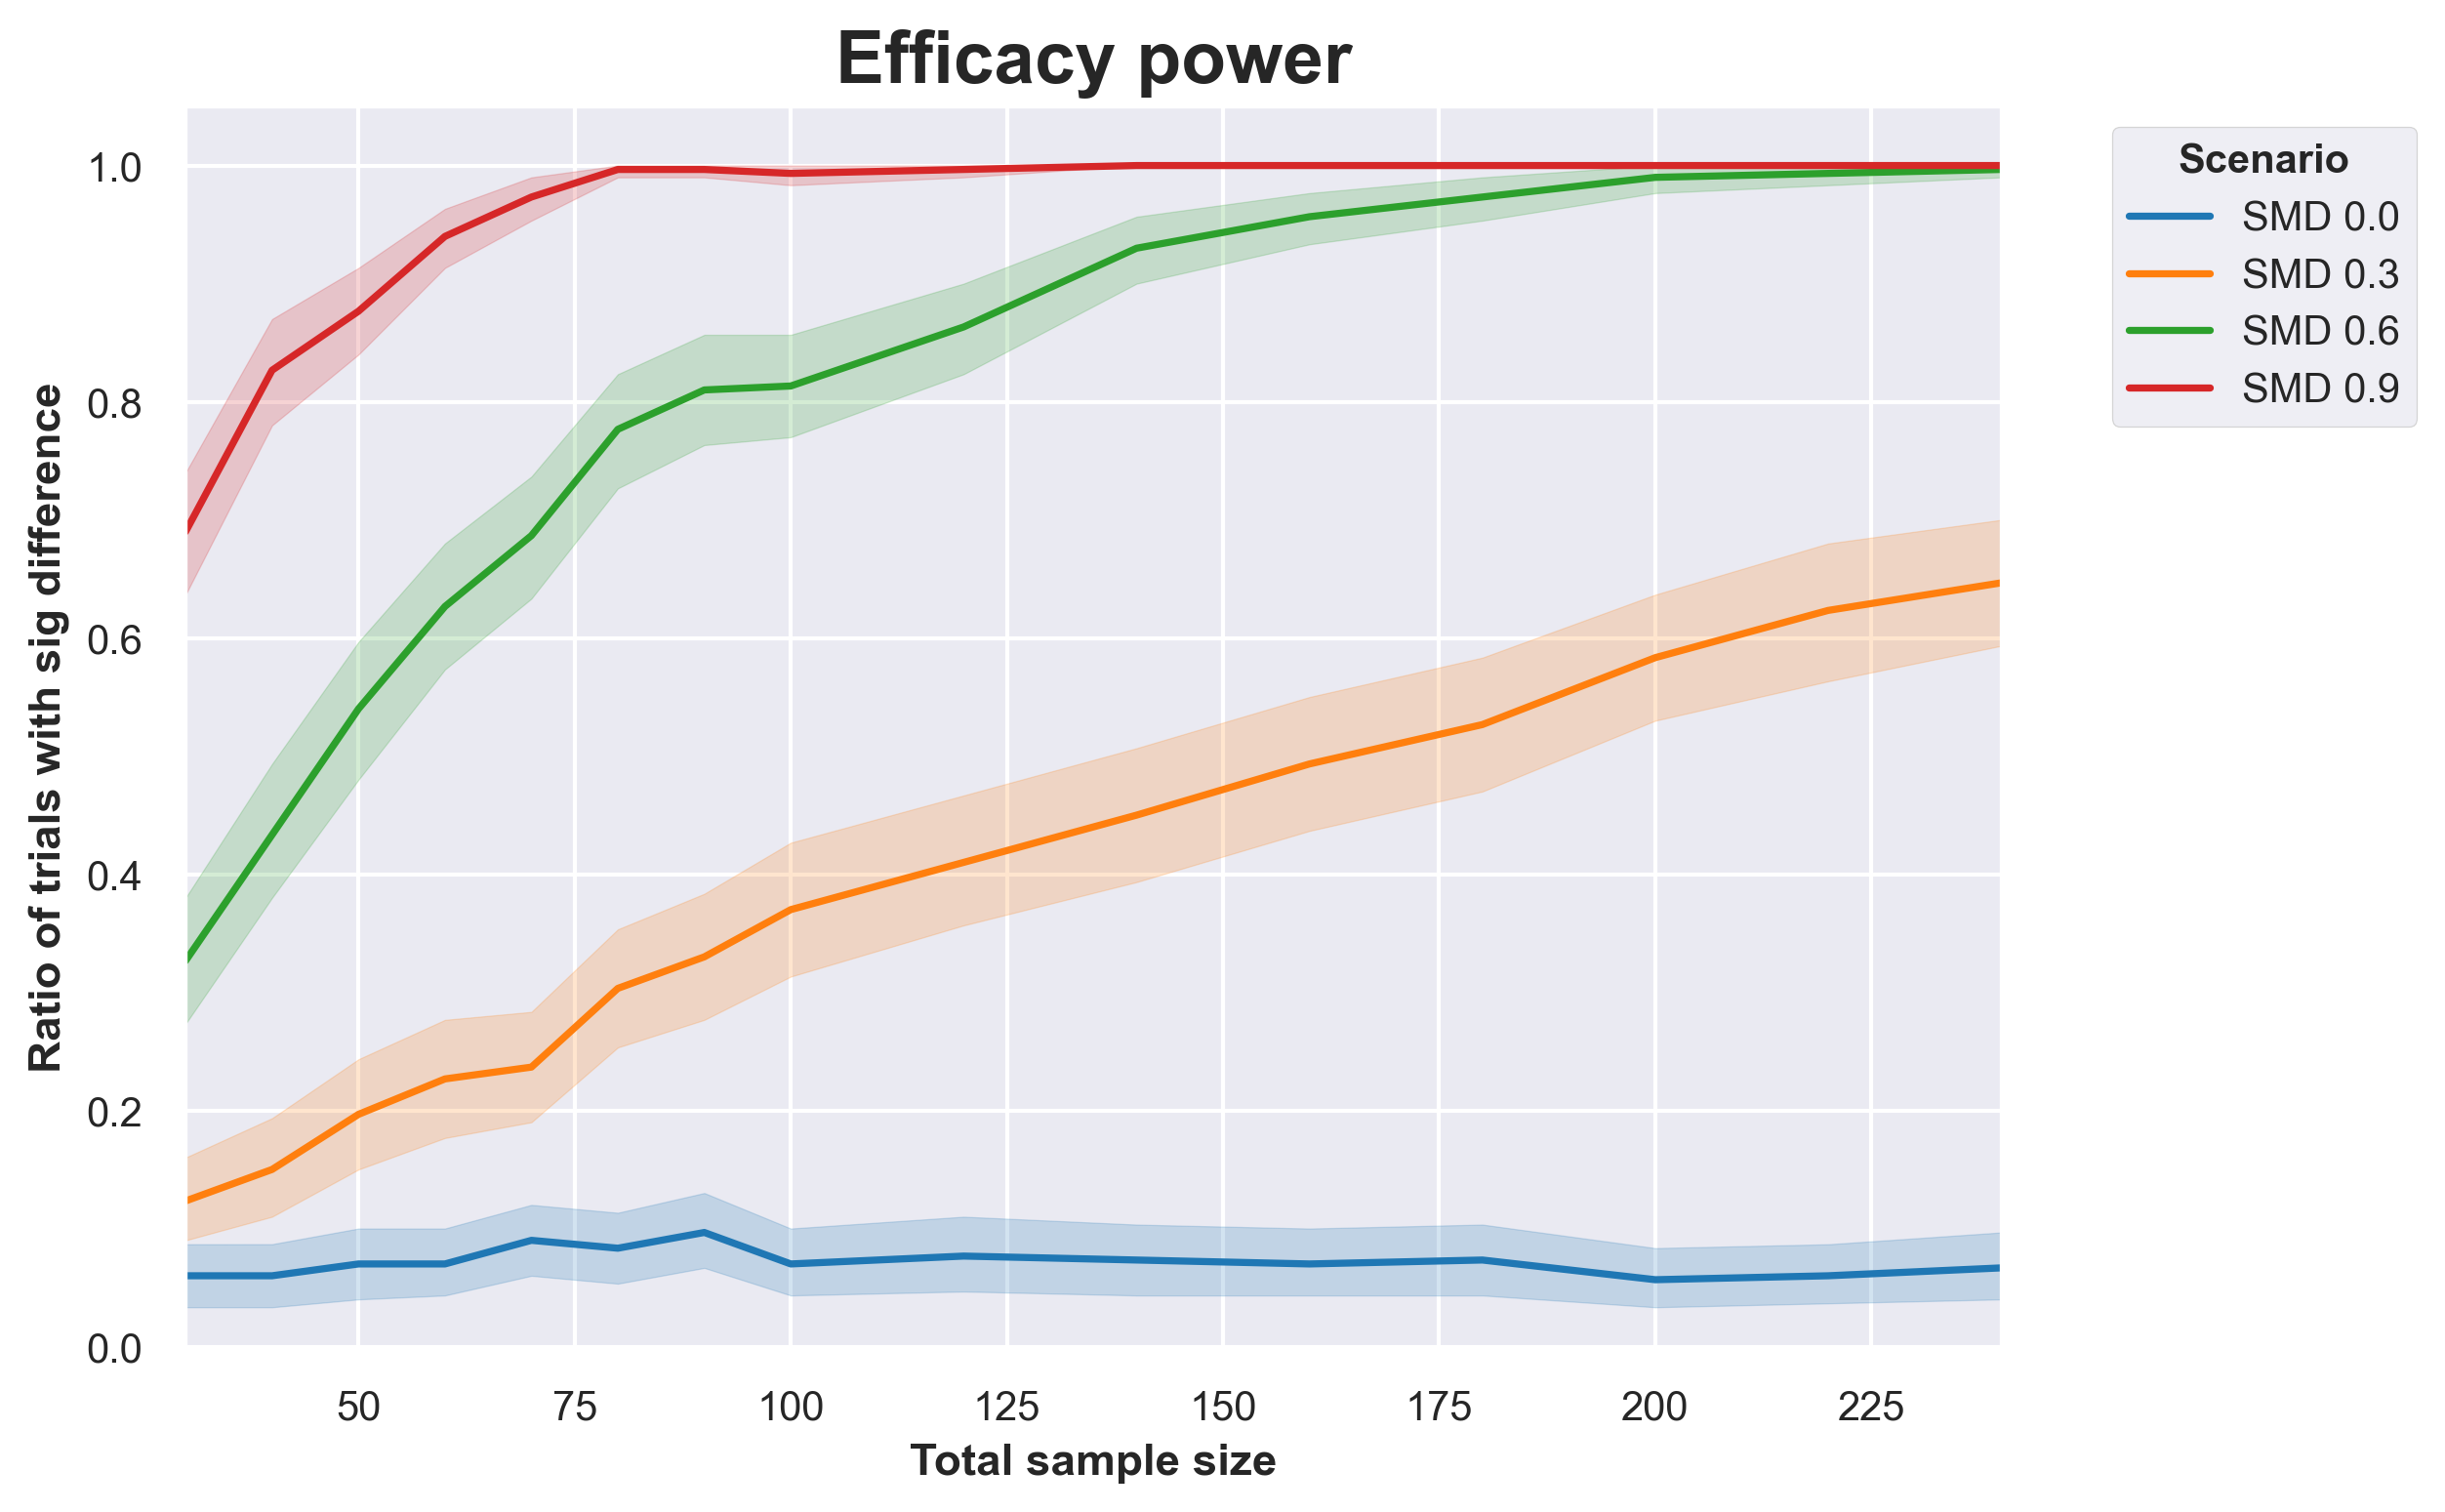

In [4]:
### Standard power plot
fig, ax = plt.subplots()
sns.lineplot(
    data = df_CIs,
    x = 'sample', 
    y = 'gmg_sd',
    hue = 'scenario',
)

plt.title('Efficacy power', fontweight='bold', fontsize=18)
ax.set_xlabel('Total sample size', fontweight='bold')
ax.set_ylabel('Ratio of trials with sig difference', fontweight='bold')
ax.set_xlim([df_CIs['sample'].min(), df_CIs['sample'].max()])
ax.set_ylim([0, 1.05])
plt.legend(
    title='Scenario', 
    title_fontproperties = {'weight': 'bold'}, 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',)

plt.show()
fig.savefig(
    fname=os.path.join(folders.powerplots, 'efficacy_power.png'),
    bbox_inches='tight',

    format='png',
    dpi=300,)